In [8]:
import tensorflow as tf
from keras import datasets,layers,models
import matplotlib.pyplot as plt 
import numpy as np

In [9]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

Gán tên cho labels, tạo hàm show hình ảnh bằng plt.ishow()

In [10]:
y_train,y_test = y_train.reshape(-1,), y_test.reshape(-1,)
label_name = ['airplane','auto','bird','cat','deer','dog','frog','horse','ship','truck']
def show(X,y,id):
    plt.figure(figsize=(15,2))
    plt.imshow(X[id])
    plt.xlabel(label_name[y_train[id]])


Gỉam giá trị các phần tử màu RGB (0-255) 

In [11]:
X_train,X_test = X_train/255, X_test/255


Model sử dụng 2 layers, activation function của Dense là softmax, sử dụng avgpooling2D

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape = (32,32,3)),
    layers.AveragePooling2D(),
    
    layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape = (32,32,3)),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])



optimize sử dụng là SGD, loss funtion là categorical crossentropy

In [13]:
cnn.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = cnn.fit(X_train,y_train,batch_size=10,epochs =10, verbose=1, validation_data=(X_test,y_test))

Epoch 1/10
5000/5000 [==============================] - 37s 7ms/step - loss: 1.7758 - accuracy: 0.3555 - val_loss: 1.4602 - val_accuracy: 0.4718
Epoch 2/10
5000/5000 [==============================] - 35s 7ms/step - loss: 1.4036 - accuracy: 0.4963 - val_loss: 1.3087 - val_accuracy: 0.5288
Epoch 3/10
5000/5000 [==============================] - 35s 7ms/step - loss: 1.2509 - accuracy: 0.5572 - val_loss: 1.1955 - val_accuracy: 0.5740
Epoch 4/10
5000/5000 [==============================] - 35s 7ms/step - loss: 1.1395 - accuracy: 0.5981 - val_loss: 1.1152 - val_accuracy: 0.6091
Epoch 5/10
5000/5000 [==============================] - 35s 7ms/step - loss: 1.0566 - accuracy: 0.6283 - val_loss: 1.0665 - val_accuracy: 0.6321
Epoch 6/10
5000/5000 [==============================] - 37s 7ms/step - loss: 0.9925 - accuracy: 0.6527 - val_loss: 1.0511 - val_accuracy: 0.6395
Epoch 7/10
5000/5000 [==============================] - 40s 8ms/step - loss: 0.9388 - accuracy: 0.6726 - val_loss: 1.0309 - val_ac

Đồ thị bên dưới em so sánh accuracy mà model train được so với accuracy khi áp dụng thực tế với bộ (X_test,y_test) của từng epoch

accuracy: thông số accuracy của tập X_train em đo được với mỗi epoch

val_accuracy: thông số đích khi dùng X_test với mỗi epoch


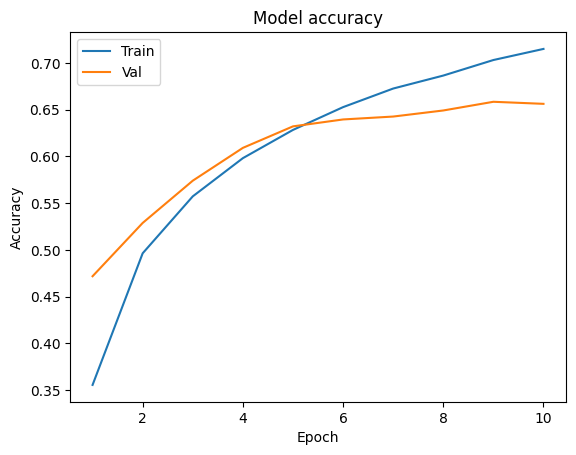

In [14]:
epoch_range = range(1,11)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show()

Đồ thị bên dưới em so sánh sự mất mát theo mô hình train và mất mát thực tế của từng Epoch với loss và val_loss tương tự đồ thị bên trên



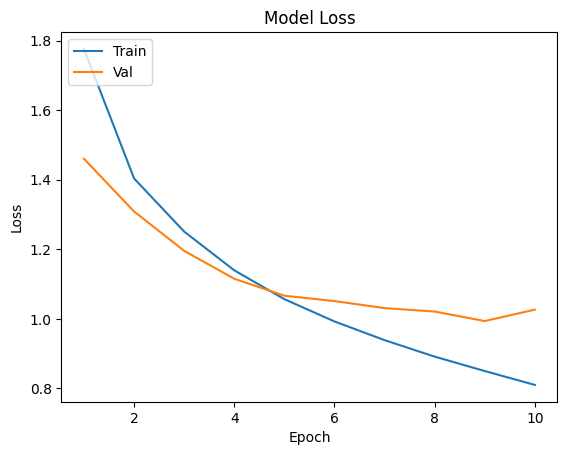

In [15]:
plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show()

In [25]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]



313/313 [==============================] - 1s 4ms/step


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_classes))


              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1000
           1       0.77      0.73      0.75      1000
           2       0.69      0.40      0.51      1000
           3       0.49      0.47      0.48      1000
           4       0.58      0.63      0.60      1000
           5       0.52      0.61      0.56      1000
           6       0.79      0.69      0.74      1000
           7       0.63      0.78      0.70      1000
           8       0.81      0.75      0.78      1000
           9       0.64      0.77      0.70      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000



In [27]:
print(confusion_matrix(y_test,y_classes))

[[737  23  25  26  23  11   8  19  68  60]
 [ 37 730   5  14  10   4   9   9  23 159]
 [ 71  11 403  83 141 125  55  71  16  24]
 [ 21  14  33 470  85 223  42  69  15  28]
 [ 23   3  35  50 627  53  45 141  11  12]
 [ 15   4  26 168  42 608  21  87  10  19]
 [  8  11  31  80  74  49 689  21  12  25]
 [ 13   6  10  32  52  72   0 779   2  34]
 [ 69  49   6  25  15  14   1   8 748  65]
 [ 41 101   6  15   8   8   3  24  23 771]]
